In [1]:
from tensorflow.keras.datasets import cifar10
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 1727s 10us/step


In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
np.unique(y_train)

In [ ]:
x_train = x_train/np.max(x_train)
x_test = x_test/np.max(x_test)

In [19]:
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Dense, Flatten, Embedding

In [20]:
def build_model():
    model = models.Sequential()
    model.add(layers.Conv2D(16, (3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [21]:
model = build_model()

In [28]:
27*16 + 16

448

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                115232    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 116,010
Trainable params: 116,010
Non-trainable params: 0
_________________________________________________________________


In [29]:
hist = model.fit(x_train, y_train, epochs=20, batch_size=18, validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 13s 287us/sample - loss: 2.4684 - accuracy: 0.0994 - val_loss: 2.3028 - val_accuracy: 0.1038
Epoch 2/20
45000/45000 [==============================] - 12s 269us/sample - loss: 2.3028 - accuracy: 0.0979 - val_loss: 2.3031 - val_accuracy: 0.0976
Epoch 3/20
45000/45000 [==============================] - 12s 270us/sample - loss: 2.3028 - accuracy: 0.1014 - val_loss: 2.3027 - val_accuracy: 0.0970
Epoch 4/20
45000/45000 [==============================] - 13s 283us/sample - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3027 - val_accuracy: 0.0986
Epoch 5/20
45000/45000 [==============================] - 13s 288us/sample - loss: 2.3028 - accuracy: 0.0990 - val_loss: 2.3027 - val_accuracy: 0.0958
Epoch 6/20
45000/45000 [==============================] - 13s 292us/sample - loss: 2.3028 - accuracy: 0.0989 - val_loss: 2.3029 - val_accuracy: 0.0950
Epoch 7/20
45000/45000 [=====================

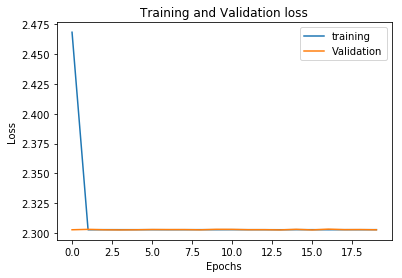

In [50]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['training', 'Validation'], loc='best')
plt.show()

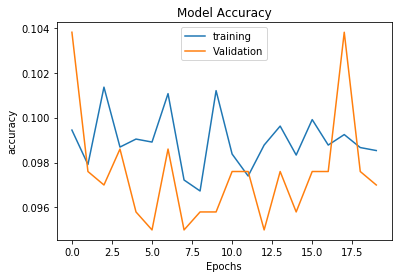

In [51]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['training', 'Validation'], loc='best')
plt.show()